In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
%matplotlib inline

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

### Building a KNN model

In [2]:
iris = load_iris()
x = iris.data
y = iris.target

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Target'] = iris.target

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df['Target'].unique()
df['Species'] = iris.target_names[iris.target]

In [93]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Data Visualization

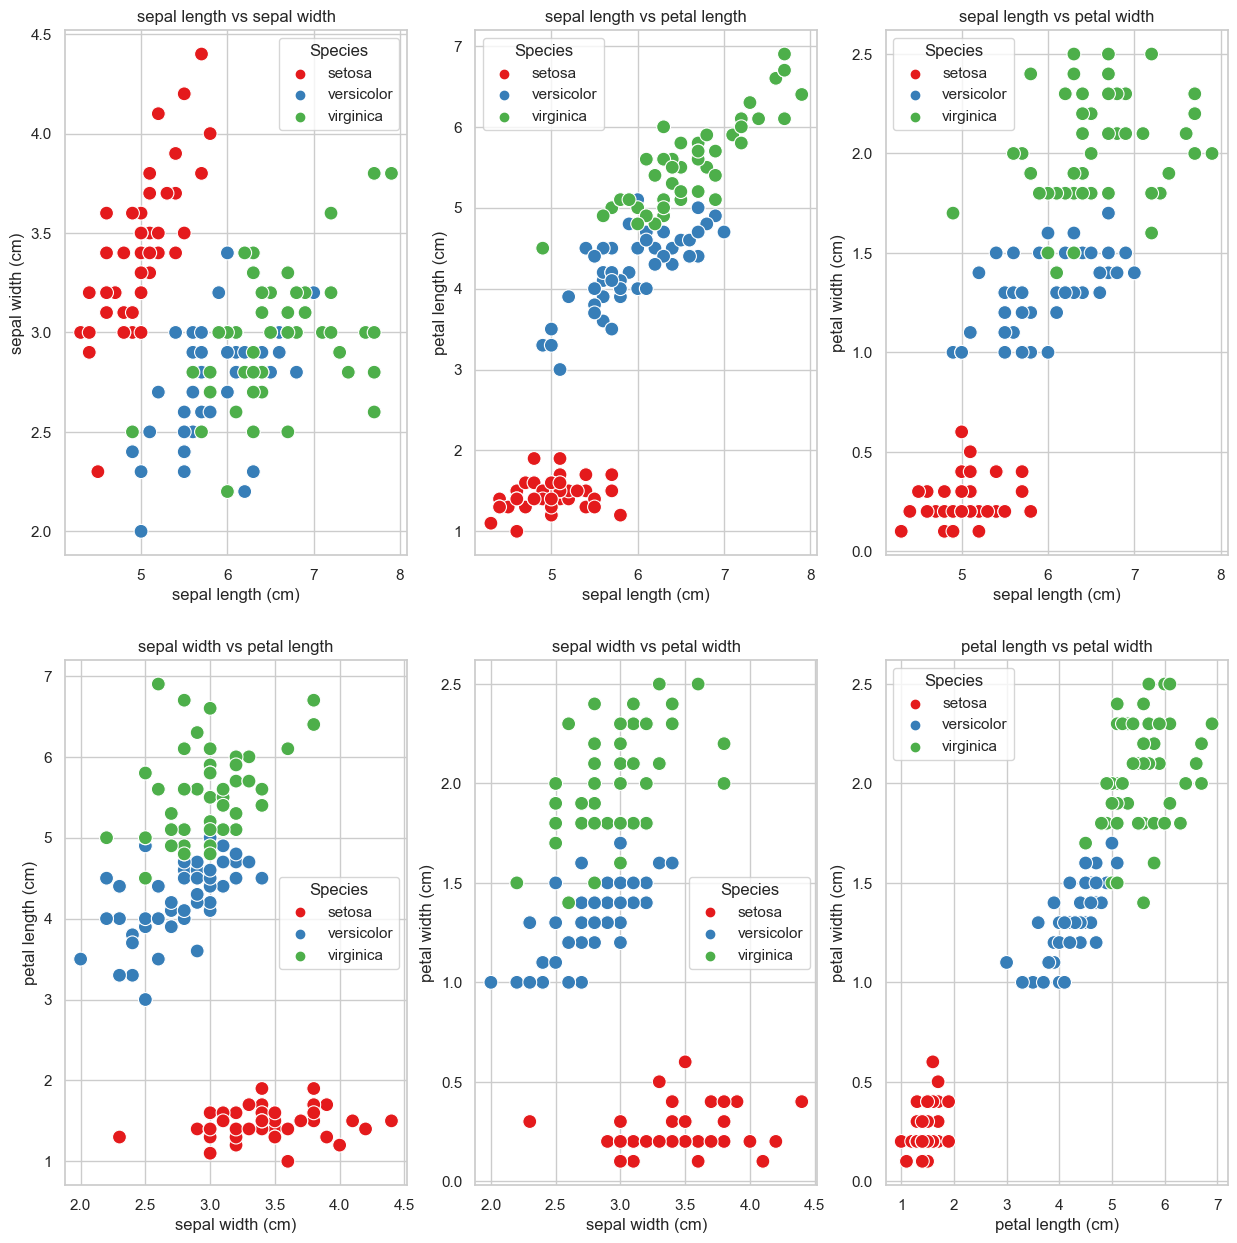

In [4]:
sns.set(style='whitegrid')

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))


sns.scatterplot(x='sepal length (cm)', y= 'sepal width (cm)', hue='Species', data=df, palette='Set1', s=100, ax=axs[0,0])
axs[0,0].set_title('sepal length vs sepal width')

sns.scatterplot(x='sepal length (cm)', y= 'petal length (cm)', hue='Species', data=df, palette='Set1', s=100, ax=axs[0,1])
axs[0,1].set_title('sepal length vs petal length')

sns.scatterplot(x='sepal length (cm)', y= 'petal width (cm)', hue='Species', data=df, palette='Set1', s=100, ax=axs[0,2])
axs[0,2].set_title('sepal length vs petal width')

sns.scatterplot(x='sepal width (cm)', y= 'petal length (cm)', hue='Species', data=df, palette='Set1', s=100, ax=axs[1,0])
axs[1,0].set_title('sepal width vs petal length')

sns.scatterplot(x='sepal width (cm)', y= 'petal width (cm)', hue='Species', data=df, palette='Set1', s=100, ax=axs[1,1])
axs[1,1].set_title('sepal width vs petal width')

sns.scatterplot(x='petal length (cm)', y= 'petal width (cm)', hue='Species', data=df, palette='Set1', s=100, ax=axs[1,2])
axs[1,2].set_title('petal length vs petal width')


plt.show()

### Creating and inspecting the model

In [96]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

knnclassifier = KNeighborsClassifier(n_neighbors=3)

knnclassifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [97]:
y_pred = knnclassifier.predict(X_test)

In [15]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [98]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



<AxesSubplot:>

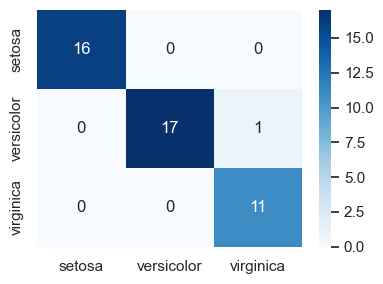

In [102]:
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='Blues', annot=True, xticklabels=['setosa','versicolor','virginica'], yticklabels=['setosa','versicolor','virginica'],ax=ax)

In [16]:
X_train[0].reshape(1,4)

array([[5. , 2. , 3.5, 1. ]])

In [17]:
knnclassifier.predict(X_train[0].reshape(1,4))

array([1])

petal length and petal width seperates classes more visibaly than combination of any other two features.
Therefore, we will build KNN model with these two parameters.

We will try to see changes in prediction with change in value of k

k=1

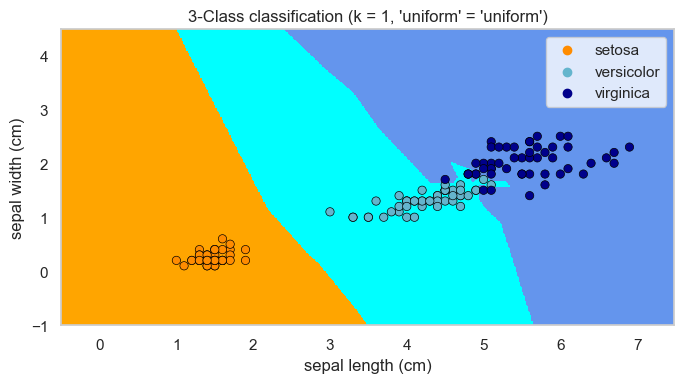

In [90]:
X = iris.data[:,2:4]
y = iris.target

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
neighbors = 1

clf_k5 = KNeighborsClassifier(n_neighbors=neighbors)
clf_k5.fit(X, y)

plt.rcParams["figure.figsize"] = [7.00, 4.00]
plt.rcParams["figure.autolayout"] = True

cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

h=0.02
x_min, x_max = X[:, 0].min() - 1.5, X[:, 1].max() + 5
y_min, y_max = X[:, 0].min() - 2, X[:, 1].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
Z = clf_k5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()

plt.contourf(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title("3-Class classification (k = %i, 'uniform' = '%s')"
% (neighbors, 'uniform'))

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()



with k=5

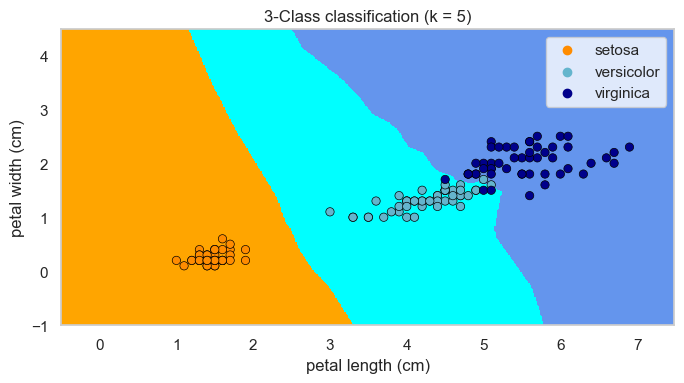

In [89]:
X = iris.data[:,2:4]
y = iris.target

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
neighbors = 5

clf_k5 = KNeighborsClassifier(n_neighbors=neighbors)
clf_k5.fit(X, y)

plt.rcParams["figure.figsize"] = [7.00, 4.00]
plt.rcParams["figure.autolayout"] = True

cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

h=0.02
x_min, x_max = X[:, 0].min() - 1.5, X[:, 1].max() + 5
y_min, y_max = X[:, 0].min() - 2, X[:, 1].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
Z = clf_k5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()

plt.contourf(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title("3-Class classification (k = %i)"
% (neighbors))

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

plt.show()



with k=10

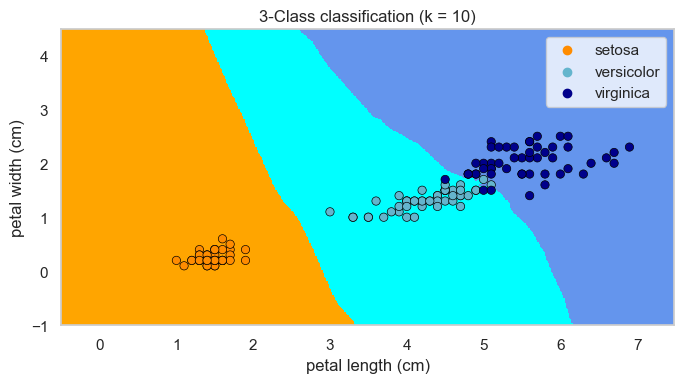

In [88]:
X = iris.data[:,2:4]
y = iris.target

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
neighbors = 10

clf_k5 = KNeighborsClassifier(n_neighbors=neighbors)
clf_k5.fit(X, y)

plt.rcParams["figure.figsize"] = [7.00, 4.00]
plt.rcParams["figure.autolayout"] = True

cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

h=0.02
x_min, x_max = X[:, 0].min() - 1.5, X[:, 1].max() + 5
y_min, y_max = X[:, 0].min() - 2, X[:, 1].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
Z = clf_k5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()

plt.contourf(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title("3-Class classification (k = %i)"
% (neighbors))

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

plt.show()



with k=15

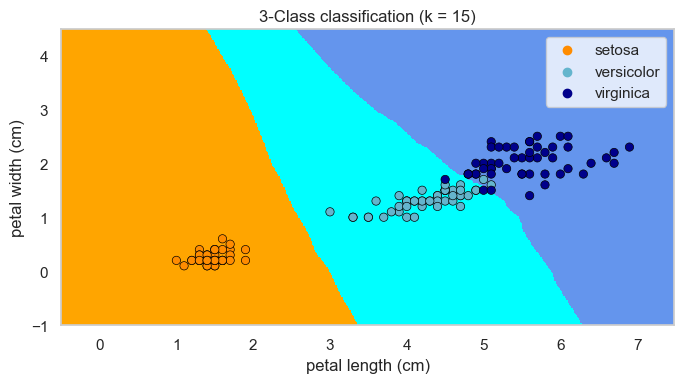

In [87]:
X = iris.data[:,2:4]
y = iris.target

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
neighbors = 15

clf_k5 = KNeighborsClassifier(n_neighbors=neighbors)
clf_k5.fit(X, y)

plt.rcParams["figure.figsize"] = [7.00, 4.00]
plt.rcParams["figure.autolayout"] = True

cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

h=0.02
x_min, x_max = X[:, 0].min() - 1.5, X[:, 1].max() + 5
y_min, y_max = X[:, 0].min() - 2, X[:, 1].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
Z = clf_k5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()

plt.contourf(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title("3-Class classification (k = %i)"
% (neighbors))

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

plt.show()



Now we will try changing value of k with different set of parameters

Enter no. of neighbors:10


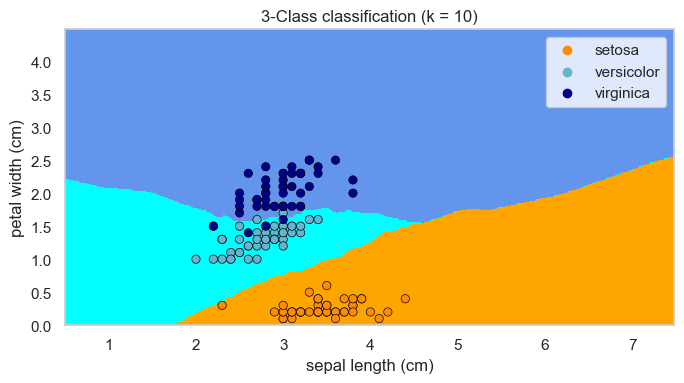

In [92]:
X = iris.data[:,[1,3]]
y = iris.target

neighbors = int(input("Enter no. of neighbors:"))

clf_k5 = KNeighborsClassifier(n_neighbors=neighbors)
clf_k5.fit(X,y)

plt.rcParams["figure.figsize"] = [7.00, 4.00]
plt.rcParams["figure.autolayout"] = True

cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

h=0.02
x_min, x_max = X[:, 0].min() - 1.5, X[:, 1].max() + 5
y_min, y_max = X[:, 0].min() - 2, X[:, 1].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
Z = clf_k5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()

plt.contourf(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title("3-Class classification (k = %i)"
% (neighbors))

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[3])

plt.show()



We have used 2 features for visualization purpose.